# 12-4 基尼系数



+ 基尼系数的性质和前面的信息熵是一样的

$$
G = \sum_{i=1}^{k} p_i * (1 - p_i)  =1 - \sum_{i=1}^{k} p_i^2 
$$


+ scikit-learn 为我们提供的决策树分类算法直接就可以处理特征是连续型数值的情况。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=66)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=66,
            splitter='best')

In [3]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

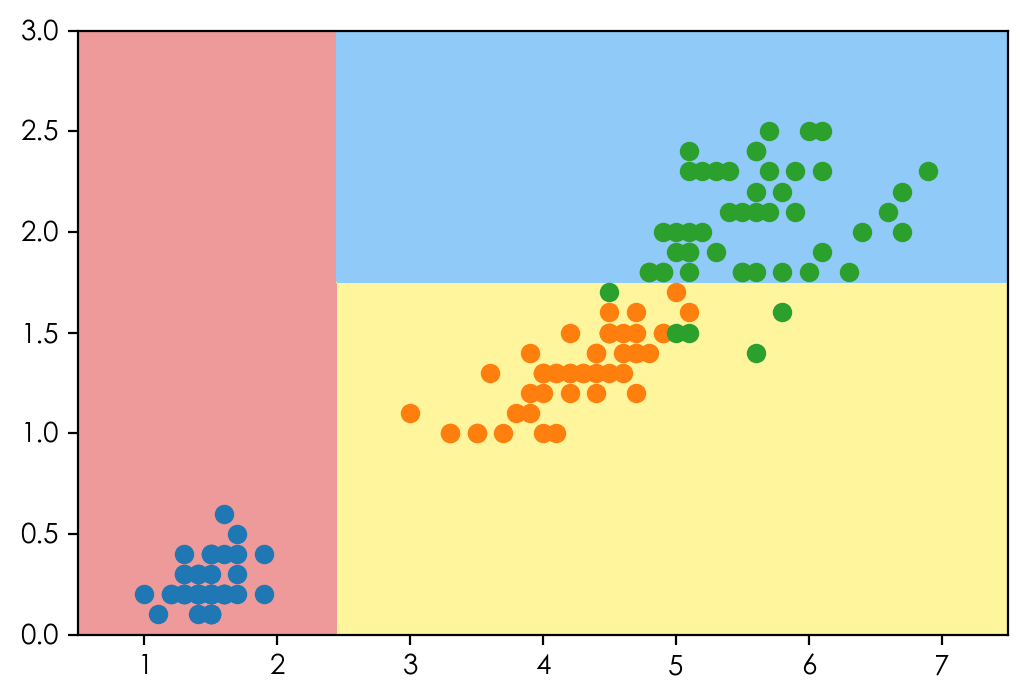

In [4]:
plt.figure(dpi=100)
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

实现使用基尼系数划分我们的数据集

$$
G = 1 - \sum_{i=1}^{k} p_i^2 
$$

In [5]:
from collections import Counter
from math import log


# 假设我们已经选定了
def split(X, y, d, value):
    '''
    d：第几个 feature
    value：value 作为划分的 value
    '''
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]


def gini(y):
    counter = Counter(y)

    res = 1.0
    for num in counter.values():
        p = num / len(y)  # 计算一下，这个类别的概率
        res += (-p ** 2)
    return res


def try_split(X, y):
    best_g = float('inf')  # 基尼系数的最大值就是 1
    best_d, best_v = -1, -1  # 最佳的 feature ，最佳的划分值
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i - 1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i - 1], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                # 注意理解这一行代码：我们回忆一下，信息熵的定义，信息熵是数据不确定性的度量，信息熵越大，数据的不确定性越大，信息熵越小，数据的确定性越大。划分好以后的数据集的信息熵一定要是最小的，才能保证在这个特征的这个划分下，不确定性越小。
                e = gini(y_l) + gini(y_r)
                if e < best_g:
                    best_g = e
                    best_d = d
                    best_v = v
    return best_g, best_d, best_v


In [6]:
best_g, best_d, best_v = try_split(X, y)

In [7]:
best_g

0.5

In [8]:
best_d

0

In [9]:
best_v

2.45

In [10]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [11]:
y1_l

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [12]:
y1_r

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
gini(y1_l)

0.0

In [14]:
gini(y1_r)

0.5

In [15]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)

In [16]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [17]:
y2_l

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [18]:
y2_r

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
gini(y2_l)

0.1680384087791495

In [20]:
gini(y2_r)

0.04253308128544431

## 画图看看基尼系数

$$
G = -2x^2 + 2x
$$

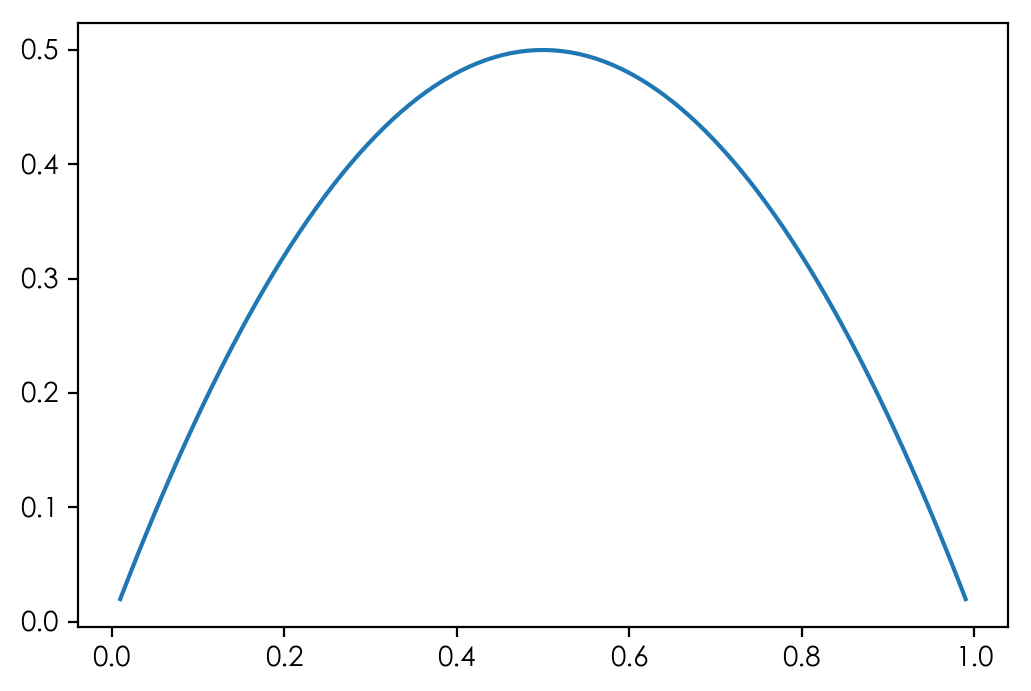

In [21]:
x = np.linspace(0.01, 0.99, 200)
plt.figure(dpi=100)
plt.plot(x, -2 * x**2 + 2 * x)
plt.show()